In [2]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the CSV dataset
# Assuming your CSV has columns 'YearsExperience' and 'Salary'
df = pd.read_csv('E:/GitHub-rzn/ML_Projects/Predict Employee Salary using Regression/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
X = df['YearsExperience'].values
X


array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [8]:
X.shape

(30,)

In [9]:
# Convert columns to numpy arrays
X = df['YearsExperience'].values.astype(np.float32).reshape(-1, 1)  # Reshape for PyTorch
y = df['Salary'].values.astype(np.float32).reshape(-1, 1)


In [10]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]], dtype=float32)

In [11]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]], dtype=float32)

In [12]:

# Step 2: Convert data to PyTorch tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)


In [13]:
X_tensor

tensor([[ 1.1000],
        [ 1.3000],
        [ 1.5000],
        [ 2.0000],
        [ 2.2000],
        [ 2.9000],
        [ 3.0000],
        [ 3.2000],
        [ 3.2000],
        [ 3.7000],
        [ 3.9000],
        [ 4.0000],
        [ 4.0000],
        [ 4.1000],
        [ 4.5000],
        [ 4.9000],
        [ 5.1000],
        [ 5.3000],
        [ 5.9000],
        [ 6.0000],
        [ 6.8000],
        [ 7.1000],
        [ 7.9000],
        [ 8.2000],
        [ 8.7000],
        [ 9.0000],
        [ 9.5000],
        [ 9.6000],
        [10.3000],
        [10.5000]])

In [14]:
y_tensor

tensor([[ 39343.],
        [ 46205.],
        [ 37731.],
        [ 43525.],
        [ 39891.],
        [ 56642.],
        [ 60150.],
        [ 54445.],
        [ 64445.],
        [ 57189.],
        [ 63218.],
        [ 55794.],
        [ 56957.],
        [ 57081.],
        [ 61111.],
        [ 67938.],
        [ 66029.],
        [ 83088.],
        [ 81363.],
        [ 93940.],
        [ 91738.],
        [ 98273.],
        [101302.],
        [113812.],
        [109431.],
        [105582.],
        [116969.],
        [112635.],
        [122391.],
        [121872.]])

Epoch [100/1000], Loss: 84458056.0000
Epoch [200/1000], Loss: 54051952.0000
Epoch [300/1000], Loss: 41028468.0000
Epoch [400/1000], Loss: 35450276.0000
Epoch [500/1000], Loss: 33061048.0000
Epoch [600/1000], Loss: 32037682.0000
Epoch [700/1000], Loss: 31599362.0000
Epoch [800/1000], Loss: 31411618.0000
Epoch [900/1000], Loss: 31331194.0000
Epoch [1000/1000], Loss: 31296758.0000
Predicted salary for 5 years of experience: $72953.24


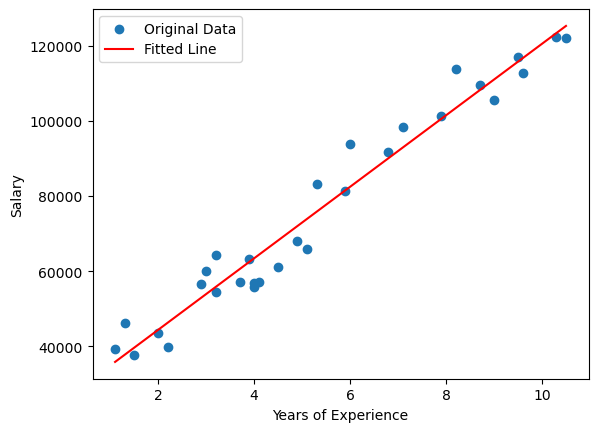

In [15]:

# Step 3: Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # Linear regression y = wx + b
        self.linear = nn.Linear(1, 1)  # Input size is 1 (YearsExperience), output size is 1 (Salary)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
model = LinearRegressionModel()

# Step 4: Define the loss function (Mean Squared Error) and optimizer (Stochastic Gradient Descent)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Step 5: Train the model
epochs = 1000
for epoch in range(epochs):
    # Forward pass: Compute predicted y by passing X to the model
    y_pred = model(X_tensor)

    # Compute the loss
    loss = criterion(y_pred, y_tensor)

    # Backward pass: Compute gradients
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Step 6: Make predictions (for example, for 5 years of experience)
years_of_experience = torch.tensor([[5.0]])  # Input
predicted_salary = model(years_of_experience).item()
print(f'Predicted salary for 5 years of experience: ${predicted_salary:.2f}')

# Optional: Visualize the results
predicted = model(X_tensor).detach().numpy()

plt.scatter(X, y, label='Original Data')
plt.plot(X, predicted, color='red', label='Fitted Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()
